# Problem Formulation

The data we are given is assumed to be real life data of a particular bank. This bank is currently giving out loans to its clients, but it is not always obvious which clients deserve a loan and which don't. In other words, we want to find out which of the clients are more likely to pay back the loan instead of defaulting. Let's first take a look at the data we are given:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

In [372]:
app_data = pd.read_csv('application_data.csv')

In [373]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [374]:
previous_data = pd.read_csv('previous_application.csv')

In [375]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [376]:
descriptions = pd.read_csv('columns_description.csv')

In [377]:
descriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   160 non-null    int64 
 1   Table        160 non-null    object
 2   Row          160 non-null    object
 3   Description  160 non-null    object
 4   Special      69 non-null     object
dtypes: int64(1), object(4)
memory usage: 6.4+ KB


In [378]:
descriptions.head(20)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


In [379]:
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [380]:
previous_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [381]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [382]:
app_data.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [383]:
app_data.TARGET.value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [384]:
common_columns = set(app_data.columns.tolist()).\
    intersection(set(previous_data.columns.tolist()))

common_columns

{'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'SK_ID_CURR',
 'WEEKDAY_APPR_PROCESS_START'}

In [385]:
descriptions[descriptions['Row'].isin(common_columns)]

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN
10,13,application_data,AMT_GOODS_PRICE,For consumer loans it is the price of the goods for which the loan is given,NaN
11,14,application_data,NAME_TYPE_SUITE,Who was accompanying client when he was applying for the loan,NaN
32,35,application_data,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply for the loan,NaN
33,36,application_data,HOUR_APPR_PROCESS_START,Approximately at what hour did the client apply for the loan,rounded
123,177,previous_application.csv,SK_ID_CURR,ID of loan in our sample,hashed
124,178,previous_application.csv,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application",NaN


We have 2 main sources of data to work with: 
- application_data which contains 307511 rows and 122 columns (features) 
    - This is the main data source that contains a TARGET variable. This will be our dependant variable when we build a machine learning algorithm later. It consists of 1, if a client had payment difficulties when paying back and installment, and 0 otherwise.
- previous_application which contains 1670214 rows and 37 columns (features)
    - This is data from the past of clients who took out loans before. We can link this data with our current applications to understand how clients behaviour changed (or not) from past to present.
    - This data should also be particularly useful when for our machine learning algothrithm.

We also found out that we can link the 2 data sources through SK_ID_CURR, which is the ID of loan in the current application data.

# Objective

Our main Objective is to create a classification machine learning algorithm that will predict the TARGET variable. Going forward, we will be doing some Exploratory Data Analysis (EDA) to find out which features we will be using, performing any data cleansing needed, and choosing which new features to create.

# EDA (Current Applications)

In [386]:
def plot_bar(df, x, y):
    plt.figure(figsize=(12,8))
    sns.barplot(df, x, y)
    sns.despine()

In [21]:
def plot_pie(df, column_to_count, counted=False):
    '''
    Plots a pie chart from the given data. Very low counts (less than 0.3%) are 
    not labeled to avoid clutter

    Args:
        df: pandas dataframe containing the data
        column_to_count: column name we want to count
        counted: if False, we will perform value_counts on df, otherwise we take df as is
    '''
    counts = df if counted else df[column_to_count].value_counts(normalize=True, dropna=False)

    def autopct_func(pct):
        return ('%.1f%%' % pct) if pct > 3 else ''

    plt.figure(figsize=(4, 4))
    plt.pie(
        counts,
        labels=[f'{label}' if count/counts.sum() > 0.03 else '' \
                for label, count in zip(counts.index, counts)], 
        autopct = autopct_func,
        pctdistance=0.85,
        labeldistance=1.1,
        startangle=140,
        colors=sns.color_palette("pastel"),
        explode=  [0.1 if count < counts.max() else 0 for count in counts]
        )
    plt.legend(loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title(column_to_count)
    plt.show()

In [388]:
app_data.SK_ID_CURR.value_counts(ascending=False).head()

SK_ID_CURR
100002    1
337664    1
337661    1
337660    1
337659    1
Name: count, dtype: int64

we find that there are no duplicates in our applications, and each one is unique.

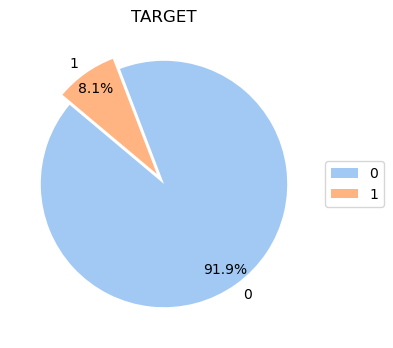

In [389]:
plot_pie(app_data, 'TARGET')

Most of the client do not have much difficulty in paying back the loans. We will need to consider the inbalance, however, when making our machine learning algorithm later.

In [390]:
app_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Since we have a lot of columns to get through, we will look have a quick look at all features that do not have too many unique different values. We will do this by summing up the percentage counts of the top 9 values, and plotting only those that make up at least 90%

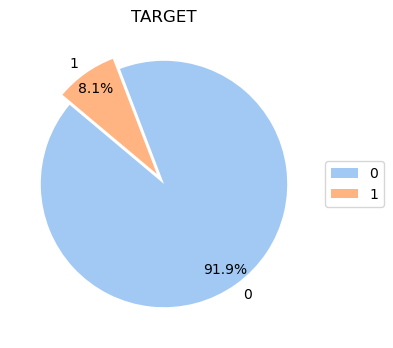

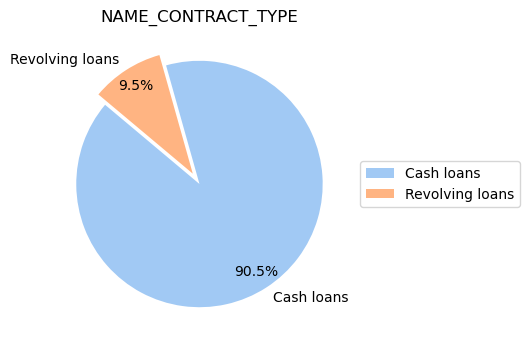

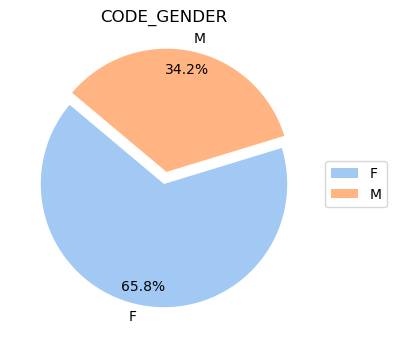

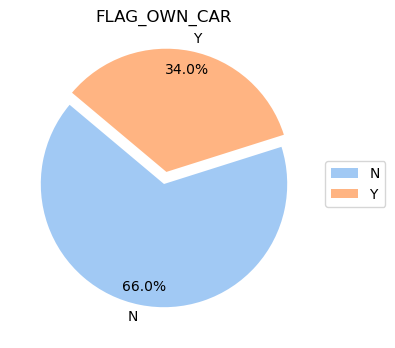

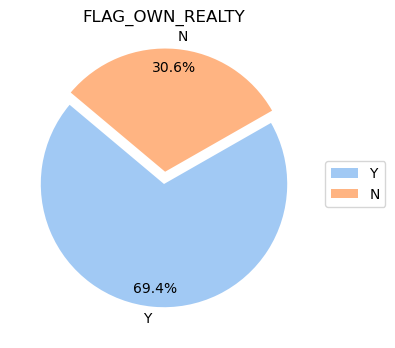

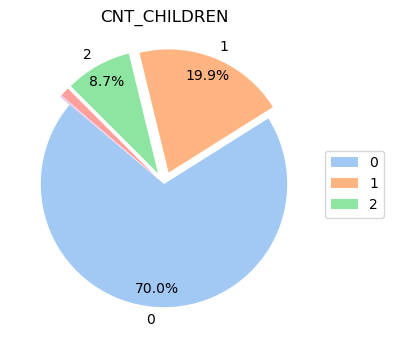

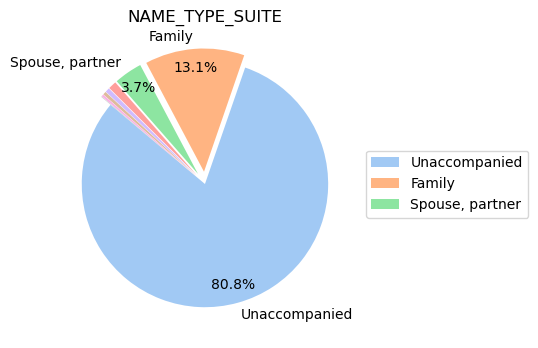

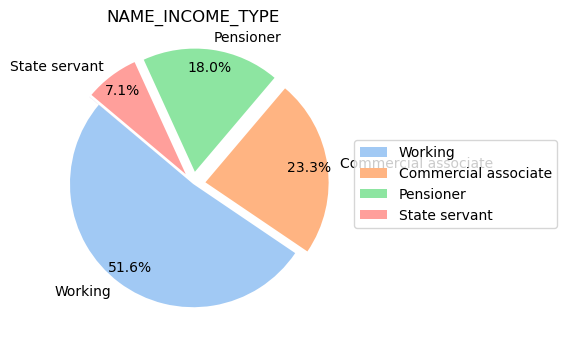

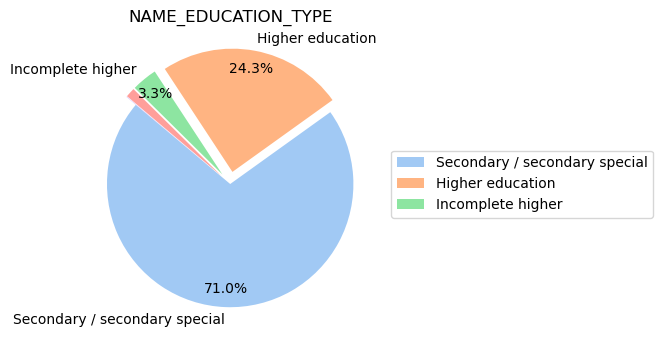

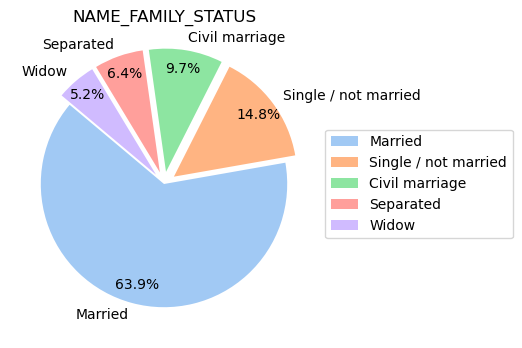

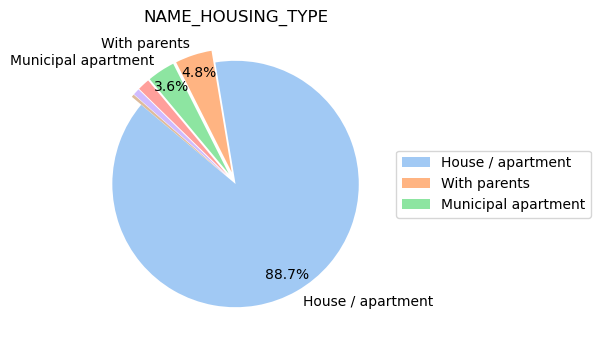

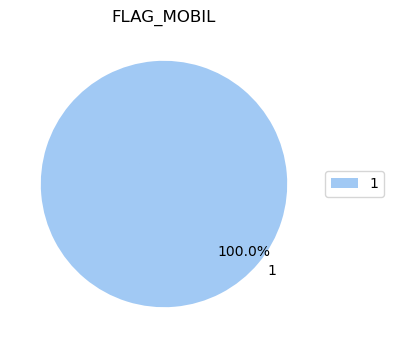

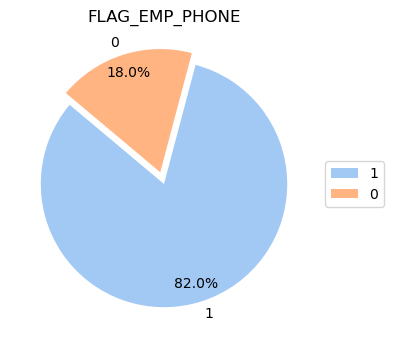

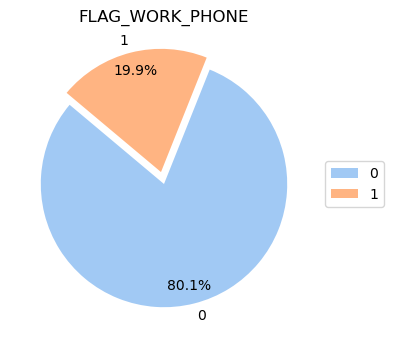

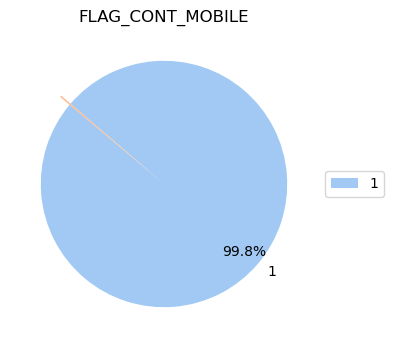

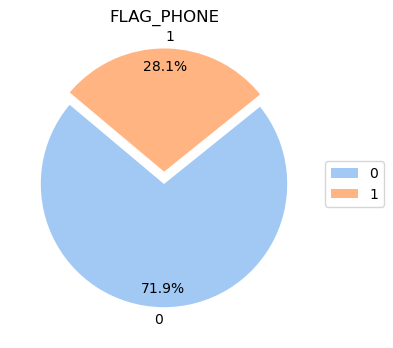

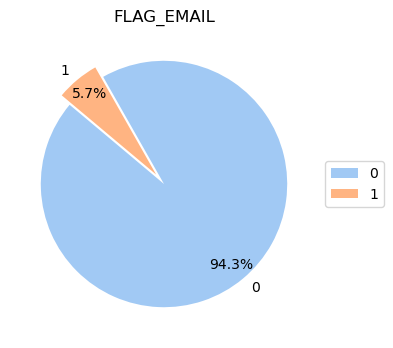

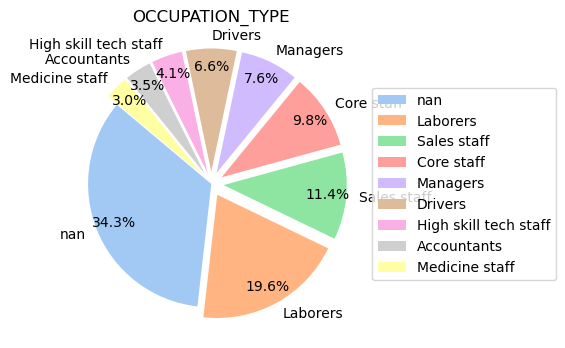

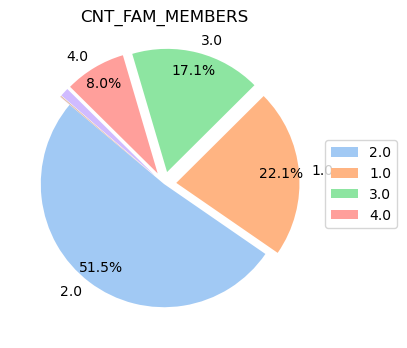

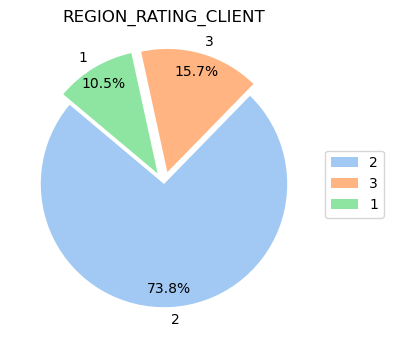

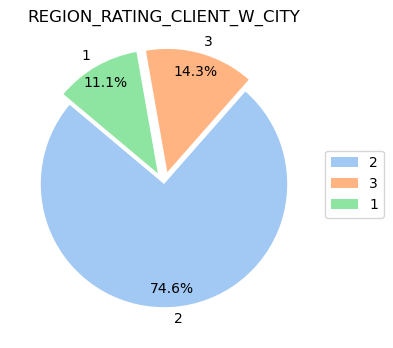

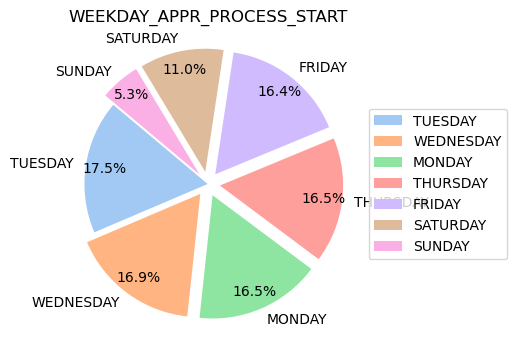

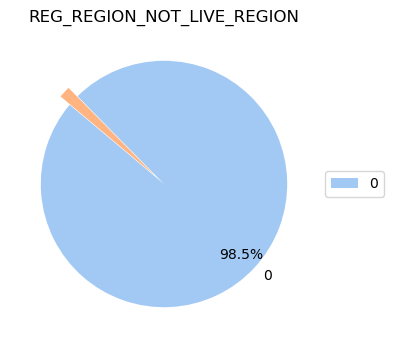

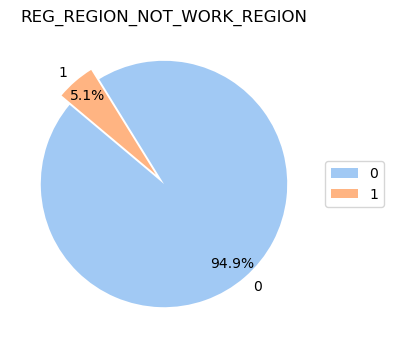

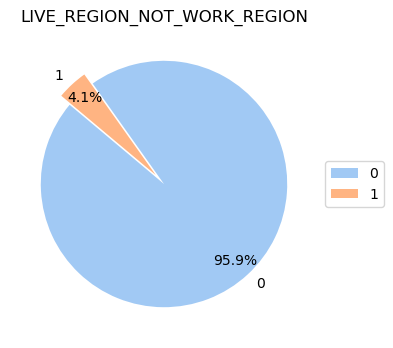

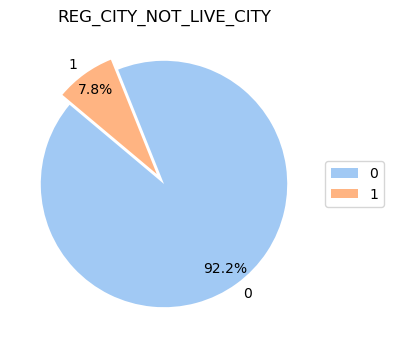

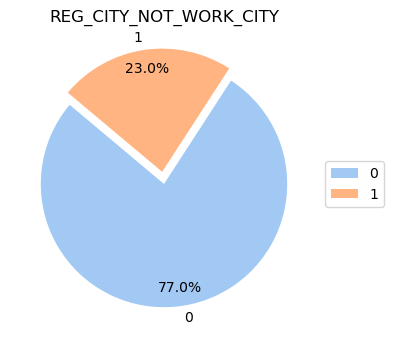

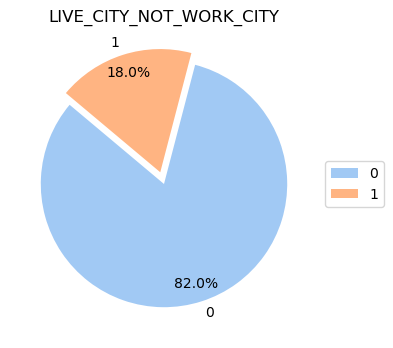

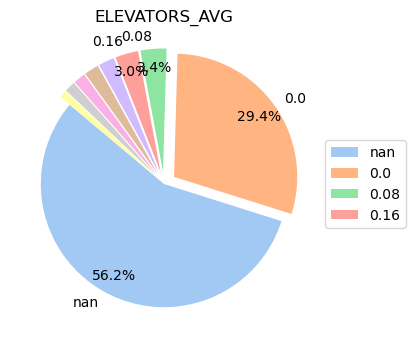

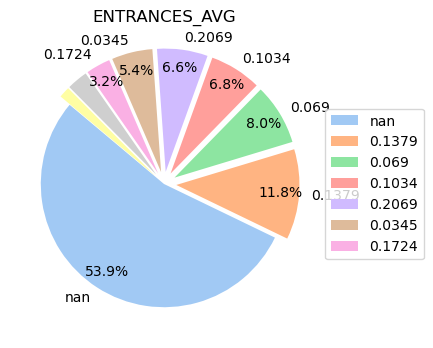

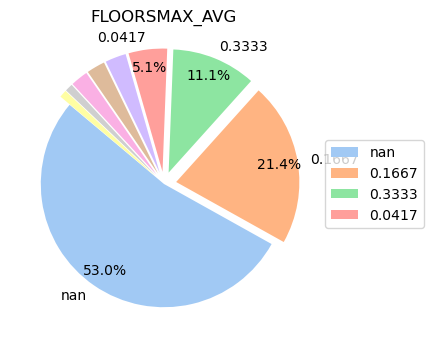

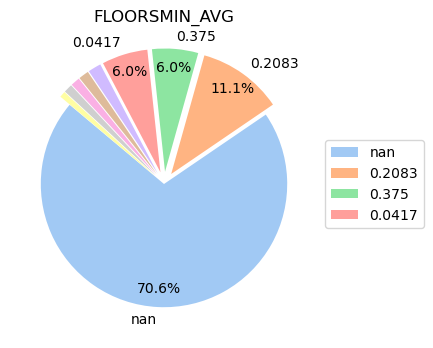

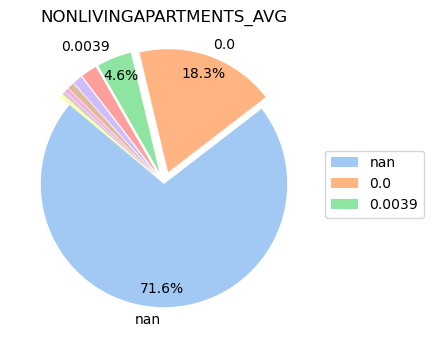

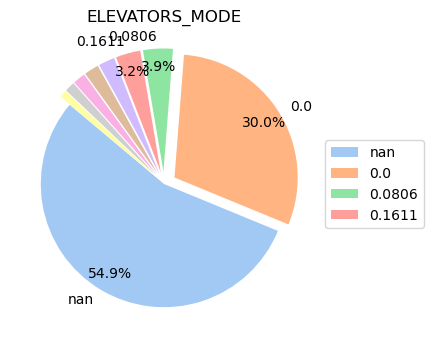

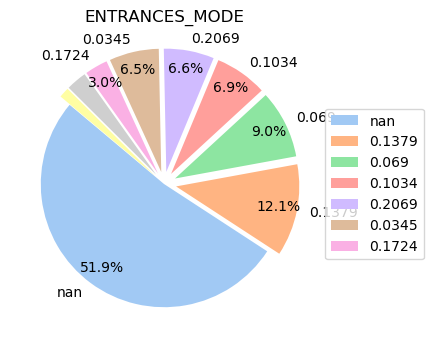

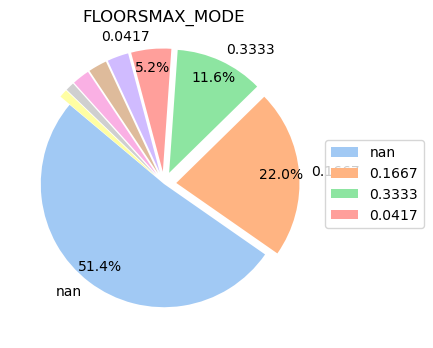

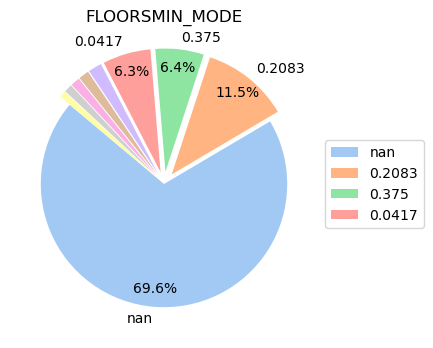

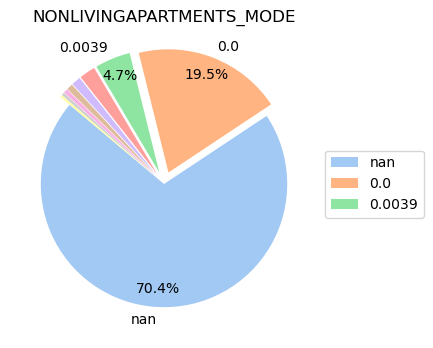

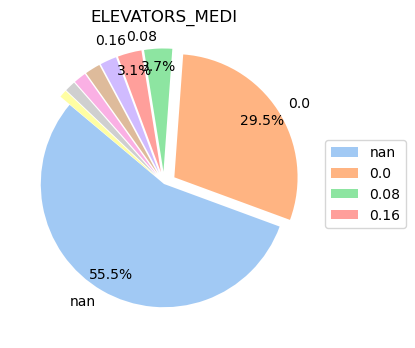

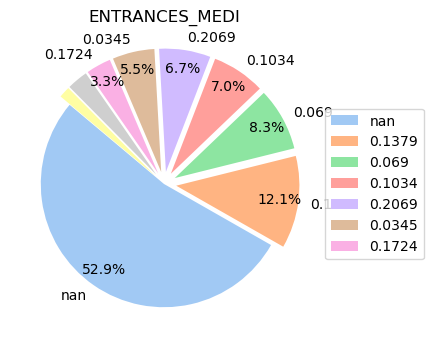

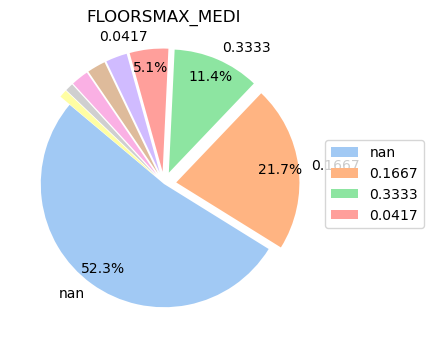

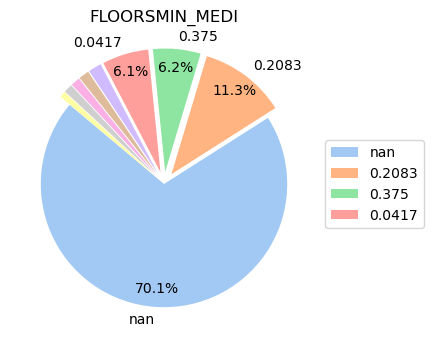

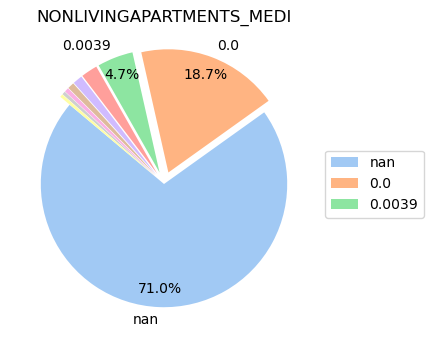

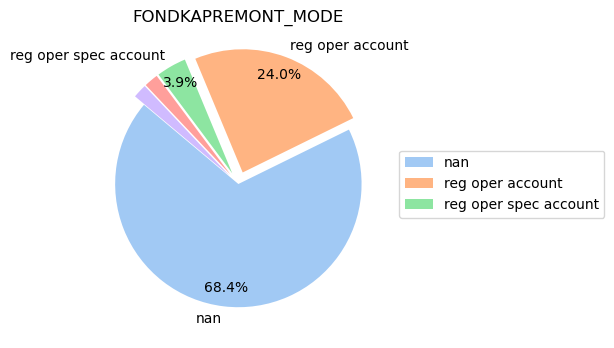

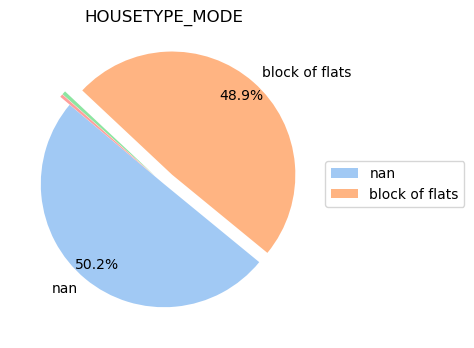

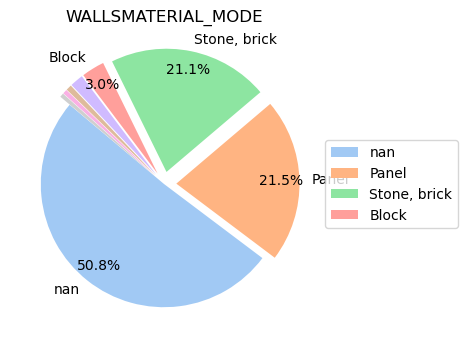

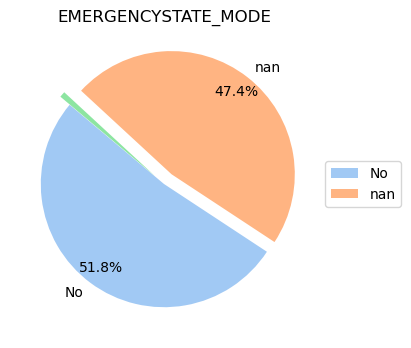

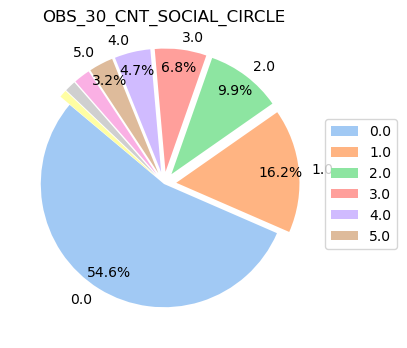

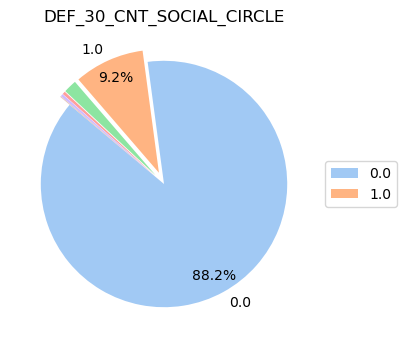

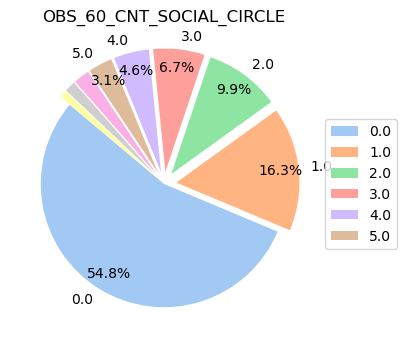

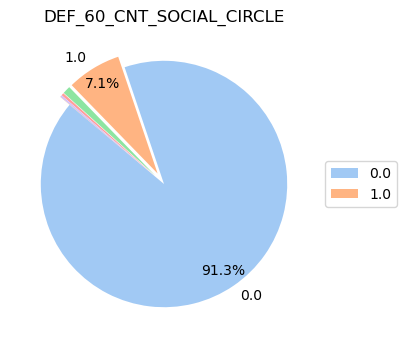

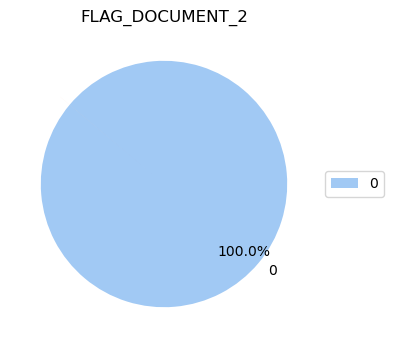

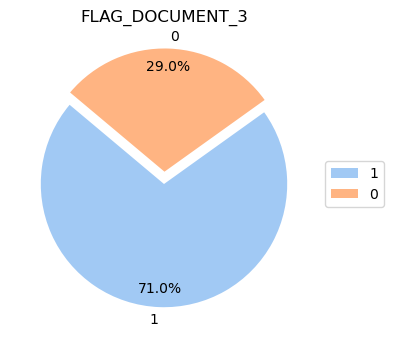

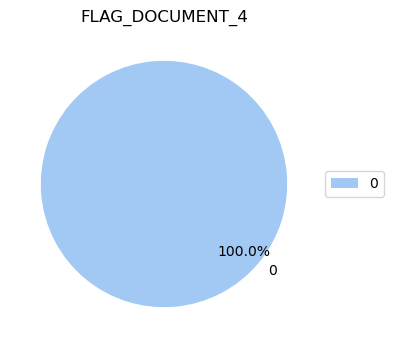

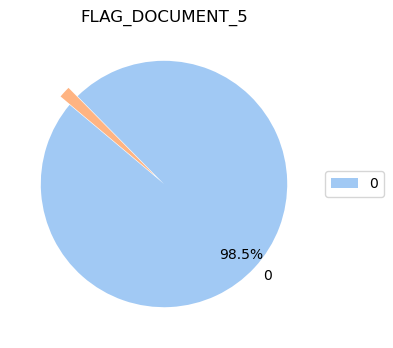

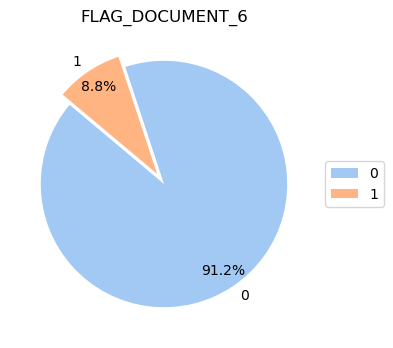

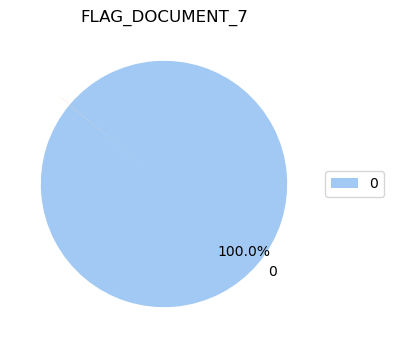

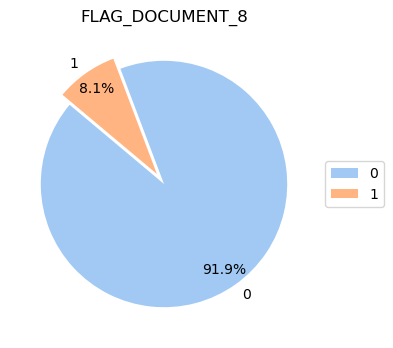

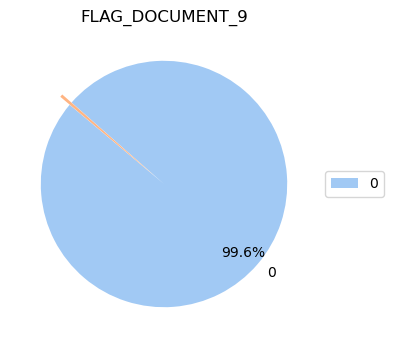

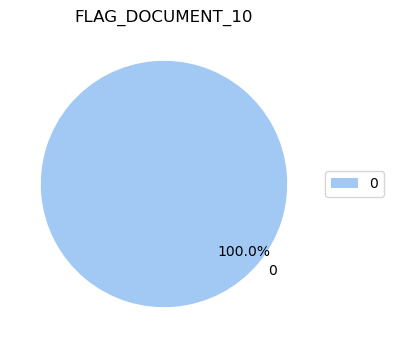

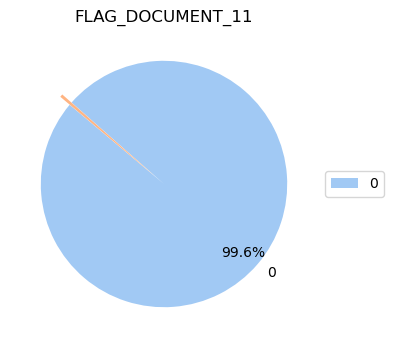

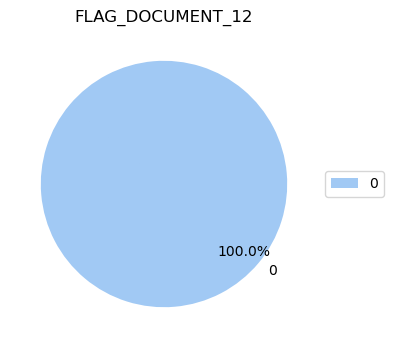

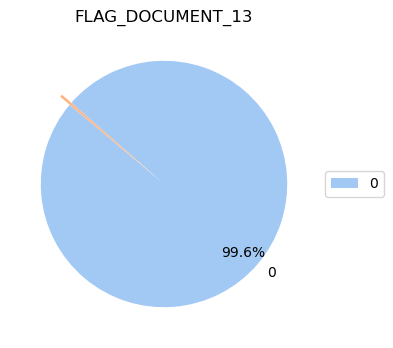

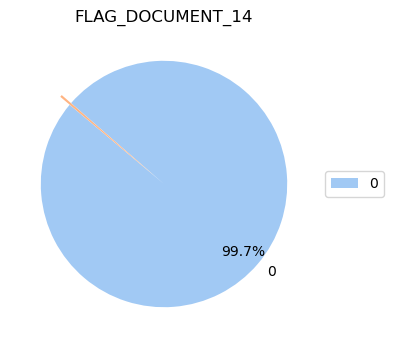

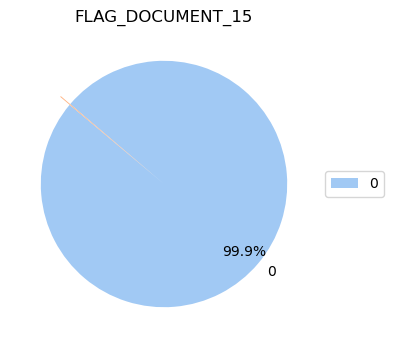

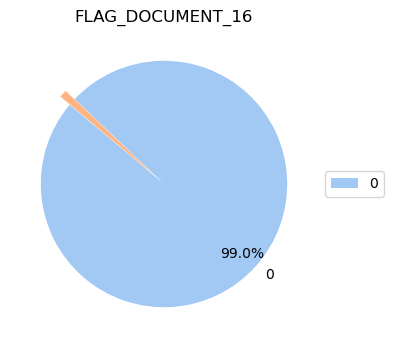

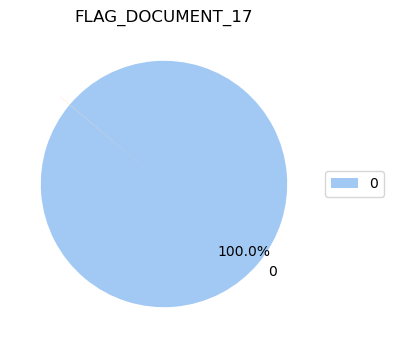

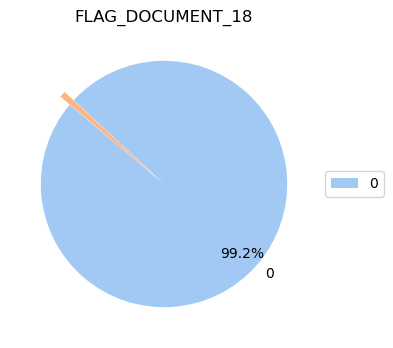

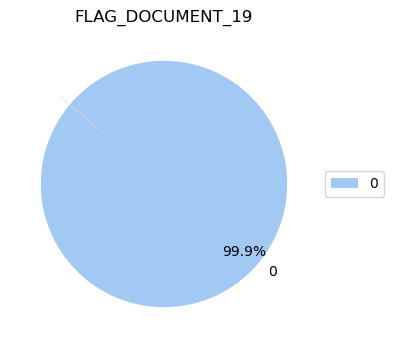

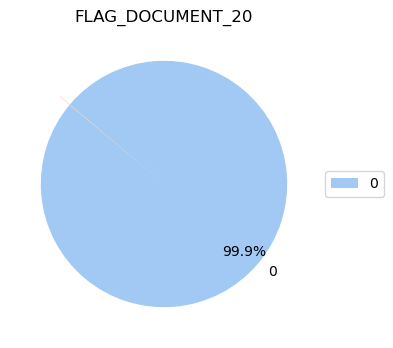

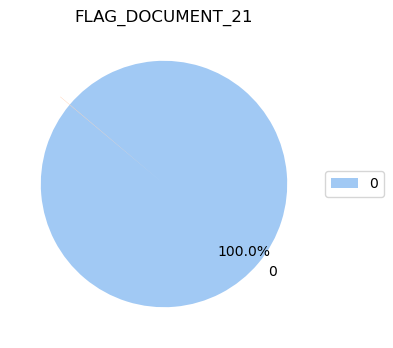

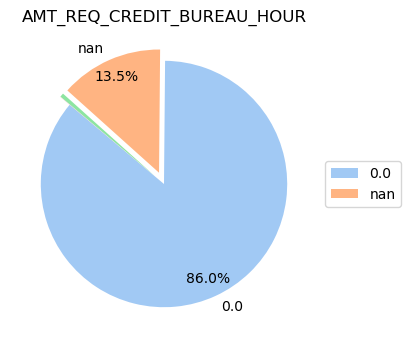

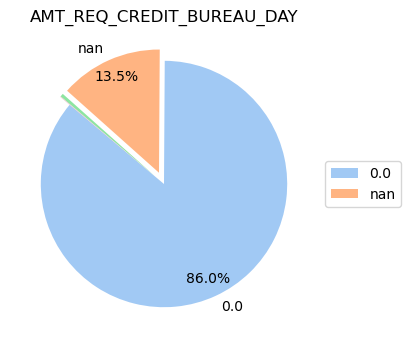

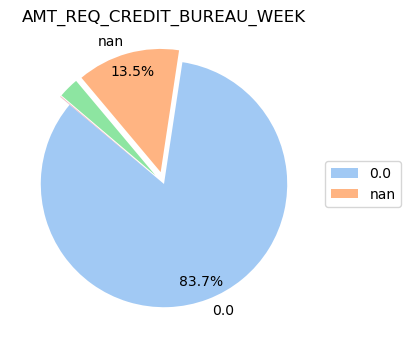

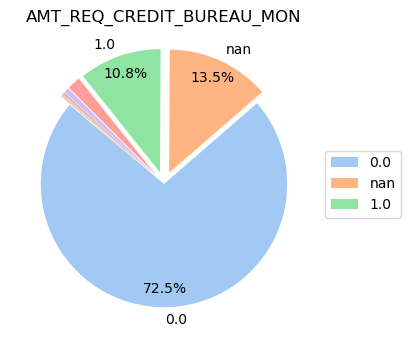

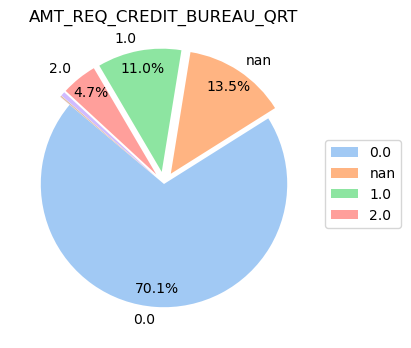

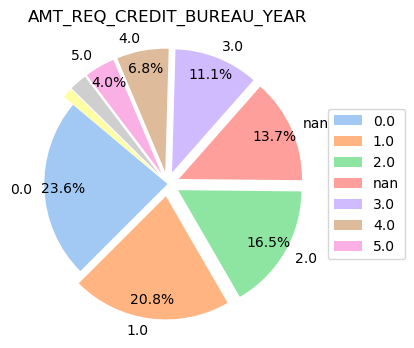

In [391]:
for column in app_data.columns:
    uniques = app_data[column].value_counts(normalize=True, dropna=False).head(9)
    if uniques.sum() >= 0.9:
        plot_pie(uniques, column, counted=True)

from the above, we understand the following:
- Almost all of the loans taken out (90.5%) are cash loans.
- About 2 thirds of our clients were female.
- About 2 thirds of our clients do not own a car.
- About 70% do not own their place of living. In other words, they probably just rent instead.
- 70% of have no children at all, followed by about 20% having 1 child and almost 9% have 2. 
- About 80% applied for a loan on their own, followed by 13.1% had Family with them and 3.7% had their spouse/partner with them.
- Regarding the type of income, 51.6% were working normally, while 23.3% were commercial associates, 18% pensioner and 7.1% as state servants
- Regarding the highest education received, 71% had only completed Secondary school, followed by 24.3% completing Higher Education and 3.3% started higher but didn't complete it.
- Regarding Family Status, about 64% were married, 15% single, about 10% had civil marriage, 6.4% separated and 5.2% widowed
- Regarding the housing situation, 89% are just living in a house/apartment, followed by 4.8% living with their parents and 3.6% having a municipal apartment.
- 82% provided a work phone number, while 18% didn't
- 80% provided a home phone number, while about 20% didn't
- another feature also described as home phone number with 72% being provided and 28% not
- 94.3% providing email address
- Regarding the type of occupation, 34.3% did not provide any info, 19.6% were laborers, 11.4% worked as sales staff, 9.8% as core staff, 7.6% managers, 6.6% drivers, and some others.
- 51.5% had 2 family members, with 22.1% having only 1, 17.1% had 3 and only 8% had 4.
- 73.8% had a regional rating of 2, while 15.7% had rating of 3 and just 10.5% rating of 1.
- If we take city into account, regional ratings are pretty much the same.
- All work days of the week were the same at about 16.5%, with the weekends (Sunday and Saturday) also amounting to about 16.5% if combined together. 
- 23% had permanent address not matching their work address (REG_CITY_NOT_WORK_CITY)
- 18% had contact address different from work address (LIVE_CITY_NOT_WORK_CITY)
- most of the building information was missing, so we won't look into that
- It was unclear to me what client's social surroundings with DPD (days past due) meant, so we'll skip those for now
- 71% of provided document 3

Also, the following features had almost all of the clients:
- provided mobile phone number (FLAG_MOBIL)
- had mobile phone reachable (FLAG_CONT_MOBILE)
- had permanent address same as contact address (REG_REGION_NOT_LIVE_REGION)
- permanent address matched work address (REG_REGION_NOT_WORK_REGION)
- contact address matched work address (LIVE_REGION_NOT_WORK_REGION)
- same with REG_CITY_NOT_LIVE_CITY
- did not provide any numbered documents (other than document 3)
- had no enquiries with the Credit bureau 1 hour, 1 day, or 1 week before the application
- did not have enquiries to the Credit Bureau

The rest of the categorical features had too many different unique values, so we won't use them in our machine learning algorithm. As an example, here is ORGANIZATION_TYPE:

In [392]:
app_data['ORGANIZATION_TYPE'].value_counts(normalize=True)

ORGANIZATION_TYPE
Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Se

# Feature Selection (Current Applications)

Based on the findings above, we will now start selecting columns useful for future classification. Let's start by removing the features with too many missing rows.

In [393]:
missing_percentages = app_data.isna().sum() / len(app_data)*100
missing_percentages.sort_values(ascending=False).head(20)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
FLOORSMIN_AVG               67.848630
FLOORSMIN_MODE              67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_AVG             66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MEDI               59.376738
LANDAREA_MODE               59.376738
LANDAREA_AVG                59.376738
dtype: float64

In [394]:
missing_percentages[missing_percentages<15].sort_values(ascending=False).head(20)

AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
dtype: float64

We will remove those with more than 15% missing columns

In [395]:
applications = app_data[missing_percentages[missing_percentages<15].index]

We will also remove the columns previously found that were mostly one value.

In [396]:
selected_columns = ['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_3']

In [397]:
applications = applications[selected_columns]
applications.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,1,0,1.0,2,0,0,Business Entity Type 3,0.262949,-1134.0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,1,0,2.0,1,0,0,School,0.622246,-828.0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,0,1.0,2,0,0,Government,0.555912,-815.0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,0,0,0,2.0,2,0,0,Business Entity Type 3,0.650442,-617.0,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,0,0,0,1.0,2,1,1,Religion,0.322738,-1106.0,0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,0,2.0,2,0,0,Other,0.354225,-2536.0,1
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,1,0,1,0,3.0,2,0,0,Business Entity Type 3,0.724000,-1562.0,0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,1,1,0,0,2.0,3,1,1,Other,0.714279,-1070.0,1
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,-3514,0,0,0,0,2.0,2,0,0,XNA,0.205747,0.0,1
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,1,0,0,0,1.0,2,0,0,Electricity,0.746644,-1673.0,0


Let's take a look at Days columns to see if they are all negative

In [398]:
(applications[[col for col in applications.columns if 'DAYS' in (col)]] > 0).sum()

DAYS_BIRTH                    0
DAYS_EMPLOYED             55374
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
DAYS_LAST_PHONE_CHANGE        0
dtype: int64

In [399]:
(applications[[col for col in applications.columns if 'DAYS' in (col)]]).describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373,-962.858788
std,4363.988632,141275.766519,3522.886321,1509.450419,826.808487
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-4292.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000,-1570.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000,-757.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000,-274.000000
max,-7489.000000,365243.000000,0.000000,0.000000,0.000000


In [400]:
applications[applications['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].value_counts()

DAYS_EMPLOYED
365243    55374
Name: count, dtype: int64

In [401]:
365243/365

1000.6657534246575

All the values above 0 are the same value which equates to about 1000 years. This is clearly a mistake, so we will replace all these values to the same max as the other columns, which is 0

In [402]:
applications.loc[applications['DAYS_EMPLOYED']>0, 'DAYS_EMPLOYED'] = 0

Changing the negative numbers to positive numbers now to match the other columns

In [403]:
applications[[col for col in applications.columns if 'DAYS' in (col)]] = \
      applications[[col for col in applications.columns if 'DAYS' in (col)]]*-1

In [404]:
(applications[[col for col in applications.columns if 'DAYS' in (col)]]).describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,16036.995067,1954.848123,4986.120328,2994.202373,962.858788
std,4363.988632,2307.068896,3522.886321,1509.450419,826.808487
min,7489.000000,0.000000,-0.000000,0.000000,-0.000000
25%,12413.000000,289.000000,2010.000000,1720.000000,274.000000
50%,15750.000000,1213.000000,4504.000000,3254.000000,757.000000
75%,19682.000000,2760.000000,7479.500000,4299.000000,1570.000000
max,25229.000000,17912.000000,24672.000000,7197.000000,4292.000000


In [405]:
(applications[[col for col in applications.columns if 'DAYS' in (col)]]/365).describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,43.936973,5.355748,13.660604,8.203294,2.637969
std,11.956133,6.320737,9.651743,4.135481,2.265229
min,20.517808,0.000000,-0.000000,0.000000,-0.000000
25%,34.008219,0.791781,5.506849,4.712329,0.750685
50%,43.150685,3.323288,12.339726,8.915068,2.073973
75%,53.923288,7.561644,20.491781,11.778082,4.301370
max,69.120548,49.073973,67.594521,19.717808,11.758904


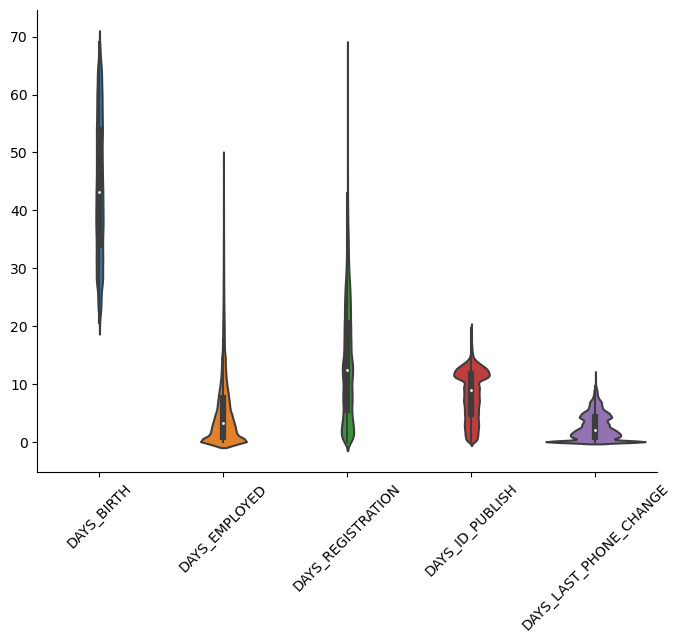

In [406]:
plt.figure(figsize=(8,6))
sns.violinplot((applications[[col for col in applications.columns if 'DAYS' in (col)]]/365))
plt.xticks(rotation = 45)
sns.despine()

Quick Insights, we find the following on average:
- age of the clients is about 44 years old
- clients have been in their job for 5 years
- they changed their registration about 13 years ago
- changed identity document about 8 years ago
- changed their phone 2 and half years ago

We need to keep in mind that birth date, employment, and registration have huge standard deviations, so averages for these are not completely useful.

Next is to deal with the missing numbers.

In [407]:
missing_percentages2 = applications.isna().sum()
missing_percentages2[missing_percentages2>0]

AMT_ANNUITY                 12
AMT_GOODS_PRICE            278
NAME_TYPE_SUITE           1292
CNT_FAM_MEMBERS              2
EXT_SOURCE_2               660
DAYS_LAST_PHONE_CHANGE       1
dtype: int64

In [408]:
applications[missing_percentages2[missing_percentages2>0].index].head(10)

,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,CNT_FAM_MEMBERS,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE
0,24700.5,351000.0,Unaccompanied,1.0,0.262949,1134.0
1,35698.5,1129500.0,Family,2.0,0.622246,828.0
2,6750.0,135000.0,Unaccompanied,1.0,0.555912,815.0
3,29686.5,297000.0,Unaccompanied,2.0,0.650442,617.0
4,21865.5,513000.0,Unaccompanied,1.0,0.322738,1106.0
5,27517.5,454500.0,"Spouse, partner",2.0,0.354225,2536.0
6,41301.0,1395000.0,Unaccompanied,3.0,0.724000,1562.0
7,42075.0,1530000.0,Unaccompanied,2.0,0.714279,1070.0
8,33826.5,913500.0,Children,2.0,0.205747,-0.0
9,20250.0,405000.0,Unaccompanied,1.0,0.746644,1673.0


In [409]:
applications['NAME_TYPE_SUITE'].value_counts(normalize=True, dropna=False)

NAME_TYPE_SUITE
Unaccompanied      0.808186
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
NaN                0.004201
Other_A            0.002816
Group of people    0.000881
Name: proportion, dtype: float64

We can consider the following:
- Spouse and children are same as family, so we will group them with the label family 
- The missing values will change to unaccompanied.
- rest we will change the labels to others 

In [410]:
applications['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [411]:
backup = applications.copy()

In [412]:
replacements = {
    'Spouse, partner': 'Family',
    'Children': 'Family',
    np.nan: 'Unaccompanied'
}

applications['NAME_TYPE_SUITE'] = applications['NAME_TYPE_SUITE'].replace(replacements)
applications['NAME_TYPE_SUITE'] = applications['NAME_TYPE_SUITE'].apply(
    lambda x: x if x in ['Family', 'Unaccompanied'] else 'Others')


In [413]:
applications['NAME_TYPE_SUITE'].value_counts(normalize=True, dropna=False)

NAME_TYPE_SUITE
Unaccompanied    0.812387
Family           0.178159
Others           0.009453
Name: proportion, dtype: float64

Next we deal with the numercial columns

In [414]:
applications[missing_percentages2[missing_percentages2>0].index].describe()

,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE
count,307499.000000,3.072330e+05,307509.000000,3.068510e+05,307510.000000
mean,27108.573909,5.383962e+05,2.152665,5.143927e-01,962.858788
std,14493.737315,3.694465e+05,0.910682,1.910602e-01,826.808487
min,1615.500000,4.050000e+04,1.000000,8.173617e-08,-0.000000
25%,16524.000000,2.385000e+05,2.000000,3.924574e-01,274.000000
50%,24903.000000,4.500000e+05,2.000000,5.659614e-01,757.000000
75%,34596.000000,6.795000e+05,3.000000,6.636171e-01,1570.000000
max,258025.500000,4.050000e+06,20.000000,8.549997e-01,4292.000000


Due to all of them having such high standard deviation relative to their respective means, we will replace the missing with the median.

In [415]:
missing_columns = missing_percentages2[missing_percentages2>0].index

applications[missing_columns]

,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,CNT_FAM_MEMBERS,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE
0,24700.5,351000.0,Unaccompanied,1.0,0.262949,1134.0
1,35698.5,1129500.0,Family,2.0,0.622246,828.0
2,6750.0,135000.0,Unaccompanied,1.0,0.555912,815.0
3,29686.5,297000.0,Unaccompanied,2.0,0.650442,617.0
4,21865.5,513000.0,Unaccompanied,1.0,0.322738,1106.0
...,...,...,...,...,...,...
307506,27558.0,225000.0,Unaccompanied,1.0,0.681632,273.0
307507,12001.5,225000.0,Unaccompanied,1.0,0.115992,-0.0
307508,29979.0,585000.0,Unaccompanied,1.0,0.535722,1909.0
307509,20205.0,319500.0,Unaccompanied,2.0,0.514163,322.0


In [416]:
applications[missing_columns.drop('NAME_TYPE_SUITE')] = applications[missing_columns.drop('NAME_TYPE_SUITE')].fillna(applications[missing_columns.drop('NAME_TYPE_SUITE')].median())

In [417]:
applications["NAME_TYPE_SUITE"] = applications["NAME_TYPE_SUITE"].fillna(applications["NAME_TYPE_SUITE"].mode())

In [418]:
missing_percentages3 = applications.isna().sum()
missing_percentages3[missing_percentages3>0]

Series([], dtype: int64)

Finally, we're going to group up the rest of the categorical columns that have low counts per unique value:

In [419]:
applications.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3'],
      dtype='object')

In [420]:
applications['NAME_EDUCATION_TYPE'].value_counts(normalize=True, dropna=False)

NAME_EDUCATION_TYPE
Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: proportion, dtype: float64

In [421]:
applications.nunique()[applications.nunique()>3]

SK_ID_CURR                    307511
CNT_CHILDREN                      15
AMT_INCOME_TOTAL                2548
AMT_CREDIT                      5603
AMT_ANNUITY                    13672
AMT_GOODS_PRICE                 1002
NAME_INCOME_TYPE                   8
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 6
NAME_HOUSING_TYPE                  6
REGION_POPULATION_RELATIVE        81
DAYS_BIRTH                     17460
DAYS_EMPLOYED                  12573
DAYS_REGISTRATION              15688
DAYS_ID_PUBLISH                 6168
CNT_FAM_MEMBERS                   17
ORGANIZATION_TYPE                 58
EXT_SOURCE_2                  119831
DAYS_LAST_PHONE_CHANGE          3773
dtype: int64

In [422]:
applications[applications.nunique()[applications.nunique()>3].index].head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE
0,100002,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1.0,Business Entity Type 3,0.262949,1134.0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,2.0,School,0.622246,828.0
2,100004,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1.0,Government,0.555912,815.0
3,100006,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,2.0,Business Entity Type 3,0.650442,617.0
4,100007,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1.0,Religion,0.322738,1106.0


In [423]:
categorical_columns = [
    'CNT_CHILDREN',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'CNT_FAM_MEMBERS',
    'ORGANIZATION_TYPE',
]

In [424]:
for column in categorical_columns:
    print(applications[column].value_counts(normalize=True)*100)
    print()

CNT_CHILDREN
0     70.036844
1     19.875387
2      8.698551
3      1.208737
4      0.139507
5      0.027316
6      0.006829
7      0.002276
14     0.000976
8      0.000650
9      0.000650
12     0.000650
10     0.000650
19     0.000650
11     0.000325
Name: proportion, dtype: float64

NAME_INCOME_TYPE
Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: proportion, dtype: float64

NAME_EDUCATION_TYPE
Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secondary                   1.240931
Academic degree                   0.053331
Name: proportion, dtype: float64

NAME_FAMILY_STATUS
Married                 63.878040
Single / not married    14.778008
Civil marriage           9.682580


In [425]:
backup = applications.copy()

In [426]:
def group_minorities(applications, column):
    '''
    Used for categorical column. This groups the values less than 8% to other.

    Args:
        applications: dataframe containing the data
        column: column we want to group up.

    Returns:
        series for the  given column with minority numbers mapped to other
    '''
    value_counts = applications[column].value_counts(normalize=True) * 100

    categories_below_threshold = value_counts[value_counts < 8].index

    return applications[column].apply(lambda x: 'Other' if x in categories_below_threshold else x)


In [427]:
applications['CNT_CHILDREN'] = group_minorities(applications, 'CNT_CHILDREN')

In [428]:
applications[column].value_counts(normalize=True) * 100


ORGANIZATION_TYPE
Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant

In [429]:
for column in categorical_columns:
    applications[column] = group_minorities(applications, column)

In [430]:
for column in categorical_columns:
    print(applications[column].value_counts(normalize=True)*100)
    print()

CNT_CHILDREN
0        70.036844
1        19.875387
2         8.698551
Other     1.389219
Name: proportion, dtype: float64

NAME_INCOME_TYPE
Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
Other                    7.075519
Name: proportion, dtype: float64

NAME_EDUCATION_TYPE
Secondary / secondary special    71.018923
Higher education                 24.344820
Other                             4.636257
Name: proportion, dtype: float64

NAME_FAMILY_STATUS
Married                 63.878040
Single / not married    14.778008
Other                   11.661371
Civil marriage           9.682580
Name: proportion, dtype: float64

NAME_HOUSING_TYPE
House / apartment    88.734387
Other                11.265613
Name: proportion, dtype: float64

CNT_FAM_MEMBERS
2.0      51.497020
1.0      22.063276
3.0      17.105404
4.0       8.031257
Other     1.303043
Name: proportion, dtype: float64

ORGANIZATION_TYPE
Other                     47.391150
Busin

So this worked very well for all columns except for ORGANIZATION_TYPE. Since it's hard to understand what exactly the values of ORGANIZATION_TYPE meant and it originally had 58 unique columns, we are just going to drop this column.

In [431]:
applications = applications.drop('ORGANIZATION_TYPE', axis=1)

In [432]:
column = 'CODE_GENDER'
applications[column].value_counts(dropna=False)

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

Converting these 4 XNA values to F

In [433]:
applications[column] = applications[column].replace({'XNA':'F'})
applications[column].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

Now to start mapping the binary columns to 1 and 0:

In [434]:
backup2 = applications.copy()

In [435]:
for column in applications.columns:
    unique_values = applications[column].unique()
    if len(unique_values) == 2:
        mapping = {unique_values[0]: 0, unique_values[1]: 1}
        applications[column] = applications[column].map(mapping)

In [436]:
applications.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3
0,100002,0,0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,0,0.018801,9461,637,3648.0,2120,0,0,0,0,1.0,2,0,0,0.262949,1134.0,0
1,100003,1,0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,Family,Other,Higher education,Married,0,0.003541,16765,1188,1186.0,291,0,0,0,0,2.0,1,0,0,0.622246,828.0,0
2,100004,1,1,0,1,0,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,0,0.010032,19046,225,4260.0,2531,0,1,0,0,1.0,2,0,0,0.555912,815.0,1
3,100006,1,0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,0,0.008019,19005,3039,9833.0,2437,0,0,1,0,2.0,2,0,0,0.650442,617.0,0
4,100007,1,0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,0,0.028663,19932,3038,4311.0,3458,0,0,1,0,1.0,2,1,1,0.322738,1106.0,1
5,100008,1,0,0,0,0,0,99000.0,490495.5,27517.5,454500.0,Family,Other,Secondary / secondary special,Married,0,0.035792,16941,1588,4970.0,477,0,1,0,0,2.0,2,0,0,0.354225,2536.0,0
6,100009,1,0,1,1,0,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,0,0.035792,13778,3130,1213.0,619,0,0,0,0,3.0,2,0,0,0.724000,1562.0,1
7,100010,1,0,0,1,0,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,Other,Higher education,Married,0,0.003122,18850,449,4597.0,2379,0,1,1,0,2.0,3,1,1,0.714279,1070.0,0
8,100011,1,0,1,0,0,0,112500.0,1019610.0,33826.5,913500.0,Family,Pensioner,Secondary / secondary special,Married,0,0.018634,20099,0,7427.0,3514,1,0,1,0,2.0,2,0,0,0.205747,-0.0,0
9,100012,1,1,0,0,0,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,0,0.019689,14469,2019,14437.0,3992,0,0,1,0,1.0,2,0,0,0.746644,1673.0,1


In [437]:
dummy_these = [
    'NAME_TYPE_SUITE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'CNT_CHILDREN',
    'CNT_FAM_MEMBERS',
]

In [438]:
dummy_variables = pd.get_dummies(applications[dummy_these],dtype=int, drop_first=True)

In [439]:
app_clean = pd.concat([applications.drop(dummy_these, axis=1), dummy_variables],axis=1)

In [440]:
app_clean.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,NAME_TYPE_SUITE_Others,NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Other,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Other,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Other,NAME_FAMILY_STATUS_Single / not married,CNT_CHILDREN_1,CNT_CHILDREN_2,CNT_CHILDREN_Other,CNT_FAM_MEMBERS_2.0,CNT_FAM_MEMBERS_3.0,CNT_FAM_MEMBERS_4.0,CNT_FAM_MEMBERS_Other
0,100002,0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,0,0.018801,9461,637,3648.0,2120,0,0,0,0,2,0,0,0.262949,1134.0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
1,100003,1,0,1,0,1,270000.0,1293502.5,35698.5,1129500.0,0,0.003541,16765,1188,1186.0,291,0,0,0,0,1,0,0,0.622246,828.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,100004,1,1,0,1,0,67500.0,135000.0,6750.0,135000.0,0,0.010032,19046,225,4260.0,2531,0,1,0,0,2,0,0,0.555912,815.0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
3,100006,1,0,1,0,0,135000.0,312682.5,29686.5,297000.0,0,0.008019,19005,3039,9833.0,2437,0,0,1,0,2,0,0,0.650442,617.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
4,100007,1,0,0,0,0,121500.0,513000.0,21865.5,513000.0,0,0.028663,19932,3038,4311.0,3458,0,0,1,0,2,1,1,0.322738,1106.0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0


We are now technically ready to start prepping and building a machine learning algorithm. However, we also have 1 more data source we can use that might help with predictions. So, let's take a look at that too:

# EDA (Previous applications)

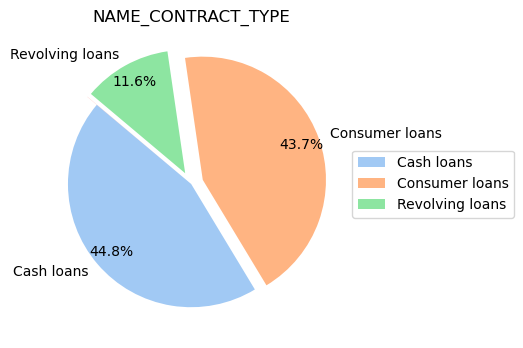

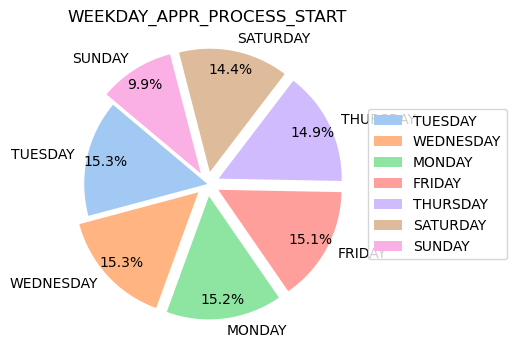

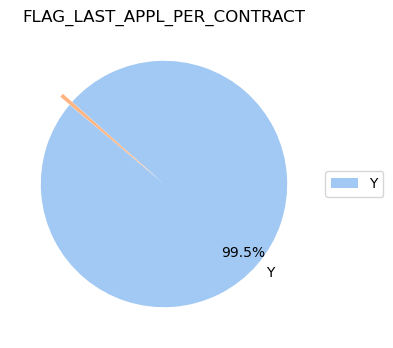

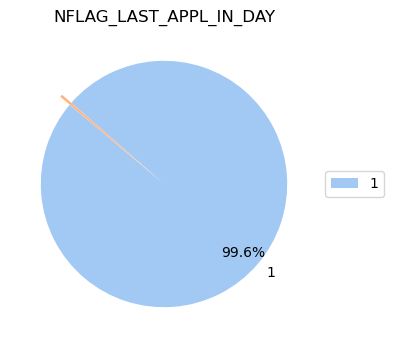

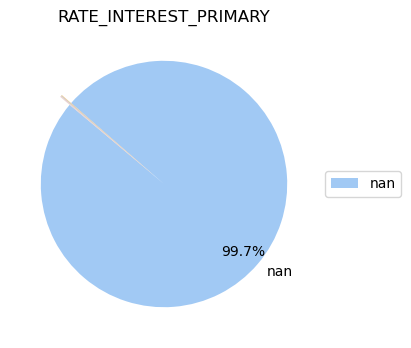

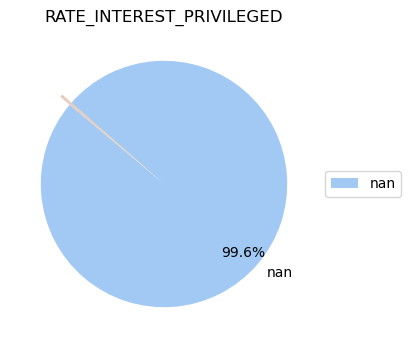

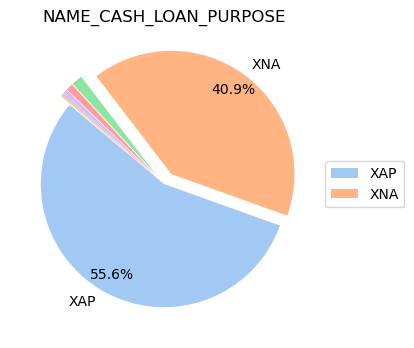

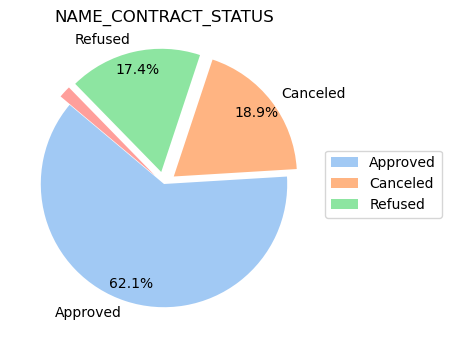

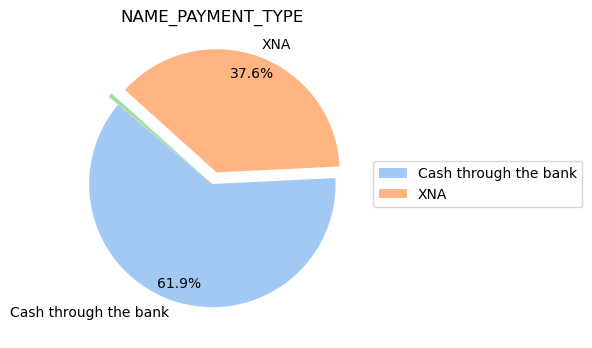

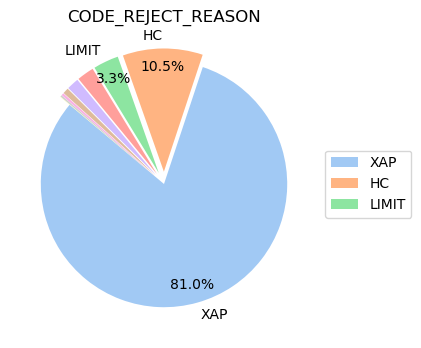

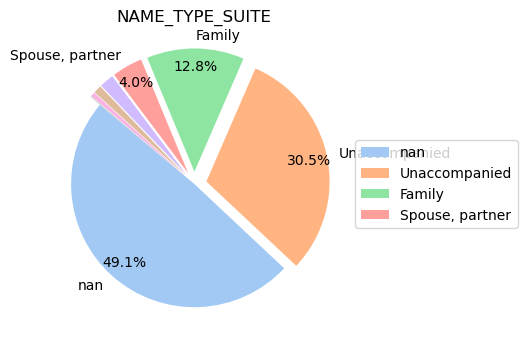

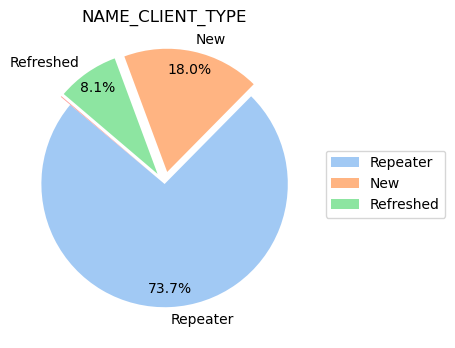

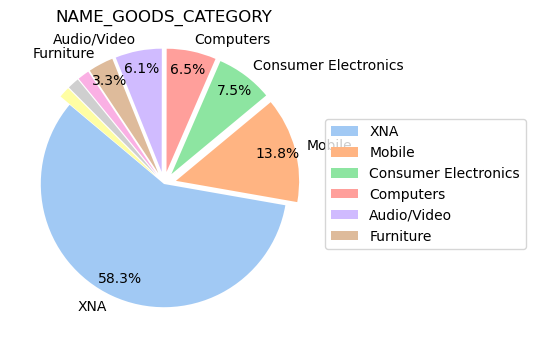

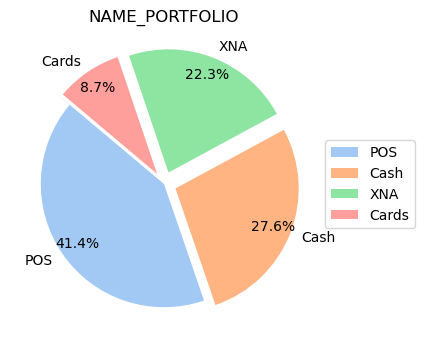

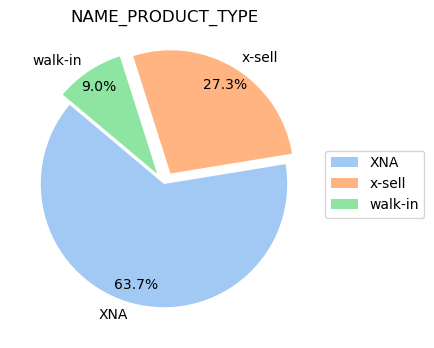

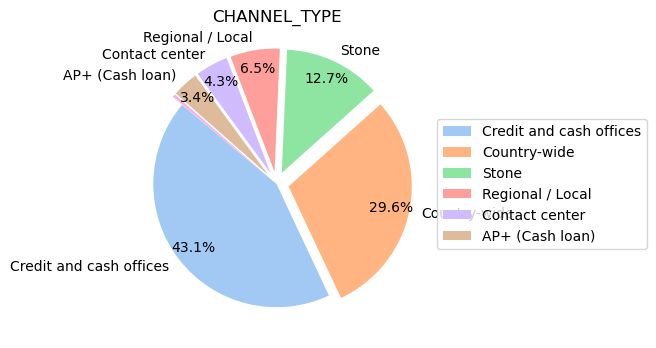

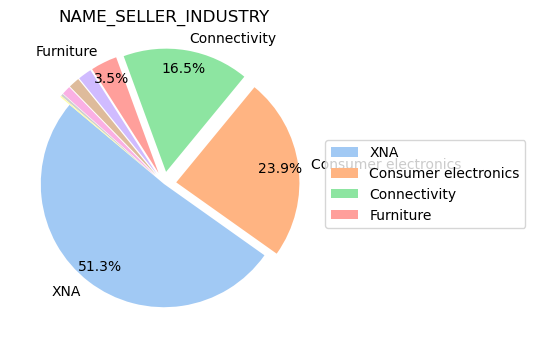

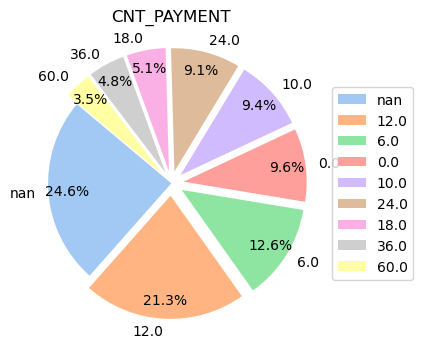

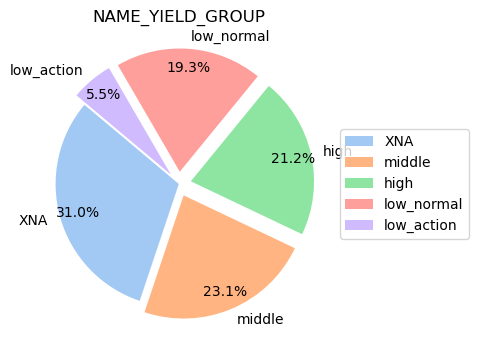

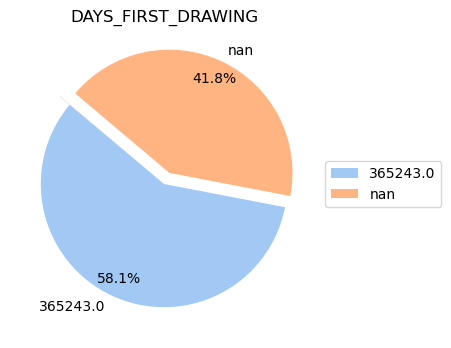

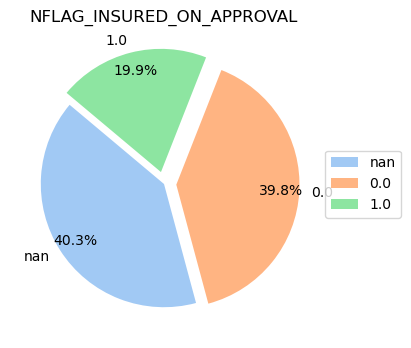

In [441]:
for column in previous_data.columns:
    uniques = previous_data[column].value_counts(normalize=True, dropna=False).head(9)
    if uniques.sum() >= 0.9:
        plot_pie(uniques, column, counted=True)

TODO:

Comparing the data from previous applications with the current applications could provide some useful insights.

# Feature Selection (Previous Applications)

In [442]:
previous_data.sort_values('SK_ID_CURR').head(20)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
201668,1369693,100001,Consumer loans,3951.000,24835.50,23787.0,2520.00,24835.50,FRIDAY,13,Y,1,0.104326,NaN,NaN,XAP,Approved,-1740,Cash through the bank,XAP,Family,Refreshed,Mobile,POS,XNA,Country-wide,23,Connectivity,8.0,high,POS mobile with interest,365243.0,-1709.0,-1499.0,-1619.0,-1612.0,0.0
892077,1038818,100002,Consumer loans,9251.775,179055.00,179055.0,0.00,179055.00,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
575941,1810518,100003,Cash loans,98356.995,900000.00,1035882.0,NaN,900000.00,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
1021650,2636178,100003,Consumer loans,64567.665,337500.00,348637.5,0.00,337500.00,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
1223745,2396755,100003,Consumer loans,6737.310,68809.50,68053.5,6885.00,68809.50,SATURDAY,15,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
935548,1564014,100004,Consumer loans,5357.250,24282.00,20106.0,4860.00,24282.00,FRIDAY,5,Y,1,0.212008,NaN,NaN,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
1259112,1857999,100005,Cash loans,NaN,0.00,0.0,NaN,NaN,FRIDAY,10,Y,1,NaN,NaN,NaN,XNA,Canceled,-315,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
1378978,2495675,100005,Consumer loans,4813.200,44617.50,40153.5,4464.00,44617.50,THURSDAY,11,Y,1,0.108964,NaN,NaN,XAP,Approved,-757,Cash through the bank,XAP,NaN,New,Mobile,POS,XNA,Country-wide,37,Connectivity,12.0,high,POS mobile with interest,365243.0,-706.0,-376.0,-466.0,-460.0,0.0
900957,1489396,100006,Revolving loans,13500.000,270000.00,270000.0,NaN,270000.00,THURSDAY,15,Y,1,NaN,NaN,NaN,XAP,Approved,-181,XNA,XAP,Unaccompanied,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
1607443,1697039,100006,Cash loans,32696.100,688500.00,906615.0,NaN,688500.00,THURSDAY,15,Y,1,NaN,NaN,NaN,XNA,Refused,-181,Cash through the bank,LIMIT,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,48.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN


We can see that a lot of the SK_ID_CURR are duplicated; meaning some of our clients applied to multiple loans in the past, not just 1. <br>
<br>
So, in order to join this data with our current applications, we will need to group the data first, to avoid duplicates in our final joined table.

In [443]:
prev_nulls = previous_data.isna().sum()/ len(previous_data) * 100
prev_nulls[prev_nulls>20]

AMT_ANNUITY                  22.286665
AMT_DOWN_PAYMENT             53.636480
AMT_GOODS_PRICE              23.081773
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
CNT_PAYMENT                  22.286366
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [444]:
for column in previous_data.columns:
    print(previous_data[column].value_counts(normalize=True, dropna=False))
    print()

SK_ID_PREV
2030495    5.987257e-07
1035848    5.987257e-07
1526498    5.987257e-07
2148893    5.987257e-07
2437429    5.987257e-07
               ...     
2811649    5.987257e-07
1221292    5.987257e-07
2780117    5.987257e-07
2194001    5.987257e-07
2418762    5.987257e-07
Name: proportion, Length: 1670214, dtype: float64

SK_ID_CURR
187868    4.610188e-05
265681    4.370697e-05
173680    4.310825e-05
242412    4.071335e-05
206783    4.011462e-05
              ...     
135285    5.987257e-07
311960    5.987257e-07
427136    5.987257e-07
241434    5.987257e-07
191629    5.987257e-07
Name: proportion, Length: 338857, dtype: float64

NAME_CONTRACT_TYPE
Cash loans         0.447579
Consumer loans     0.436561
Revolving loans    0.115652
XNA                0.000207
Name: proportion, dtype: float64

AMT_ANNUITY
NaN          2.228667e-01
2250.000     1.907839e-02
11250.000    8.366593e-03
6750.000     8.048070e-03
9000.000     7.481676e-03
                 ...     
3794.445     5.987257e-07
8

We will perform similar preprocessing steps that we did on current applications:

In [445]:
prev_nulls = previous_data.isna().sum()/ len(previous_data) * 100
prev_nulls[prev_nulls>20]

AMT_ANNUITY                  22.286665
AMT_DOWN_PAYMENT             53.636480
AMT_GOODS_PRICE              23.081773
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
CNT_PAYMENT                  22.286366
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

dropping the columns with more than 20% nulls:

In [446]:
previous_data = previous_data.drop(prev_nulls[prev_nulls>20].index, axis='columns')

In [447]:
previous_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION',
       'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

Changing days to be positive:

In [448]:
previous_data[[col for col in previous_data.columns if 'DAYS' in (col)]] = \
      previous_data[[col for col in previous_data.columns if 'DAYS' in (col)]]*-1

grouping minorities to "others" in categorical features:

In [449]:
backup_previous = previous_data.copy()

In [450]:
group_these = [
    'NAME_CASH_LOAN_PURPOSE',
    'NAME_CONTRACT_STATUS',
    'NAME_PAYMENT_TYPE',
    'CODE_REJECT_REASON',
    'NAME_CLIENT_TYPE',
    'NAME_GOODS_CATEGORY',
    'NAME_PORTFOLIO',
    'NAME_PRODUCT_TYPE',
    'CHANNEL_TYPE',
    'NAME_SELLER_INDUSTRY',
]

for column in group_these:
    previous_data[column] = group_minorities(previous_data, column)

Converting categorical to dummies:

In [451]:
dummy_these = [
    'NAME_CONTRACT_TYPE',
    'NAME_CASH_LOAN_PURPOSE',
    'NAME_CONTRACT_STATUS',
    'NAME_PAYMENT_TYPE',
    'CODE_REJECT_REASON',
    'NAME_CLIENT_TYPE',
    'NAME_GOODS_CATEGORY',
    'NAME_PORTFOLIO',
    'NAME_PRODUCT_TYPE',
    'CHANNEL_TYPE',
    'NAME_YIELD_GROUP',
    'PRODUCT_COMBINATION',
    'NAME_SELLER_INDUSTRY',
]

In [452]:
dummy_variables = pd.get_dummies(previous_data[dummy_these], dtype='int',drop_first=True)

prev_clean = pd.concat([previous_data.drop(dummy_these, axis=1), dummy_variables],axis=1)

In [453]:
prev_clean.head()

,SK_ID_PREV,SK_ID_CURR,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,NAME_CASH_LOAN_PURPOSE_XAP,NAME_CASH_LOAN_PURPOSE_XNA,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Other,NAME_CONTRACT_STATUS_Refused,NAME_PAYMENT_TYPE_Other,NAME_PAYMENT_TYPE_XNA,CODE_REJECT_REASON_Other,CODE_REJECT_REASON_XAP,NAME_CLIENT_TYPE_Other,NAME_CLIENT_TYPE_Refreshed,NAME_CLIENT_TYPE_Repeater,NAME_GOODS_CATEGORY_Other,NAME_GOODS_CATEGORY_XNA,NAME_PORTFOLIO_Cash,NAME_PORTFOLIO_Other,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA,NAME_PRODUCT_TYPE_walk-in,NAME_PRODUCT_TYPE_x-sell,CHANNEL_TYPE_Credit and cash offices,CHANNEL_TYPE_Other,CHANNEL_TYPE_Stone,NAME_YIELD_GROUP_high,NAME_YIELD_GROUP_low_action,NAME_YIELD_GROUP_low_normal,NAME_YIELD_GROUP_middle,PRODUCT_COMBINATION_Card X-Sell,PRODUCT_COMBINATION_Cash,PRODUCT_COMBINATION_Cash Street: high,PRODUCT_COMBINATION_Cash Street: low,PRODUCT_COMBINATION_Cash Street: middle,PRODUCT_COMBINATION_Cash X-Sell: high,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest,NAME_SELLER_INDUSTRY_Consumer electronics,NAME_SELLER_INDUSTRY_Other,NAME_SELLER_INDUSTRY_XNA
0,2030495,271877,17145.0,17145.0,SATURDAY,15,Y,1,73,35,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2802425,108129,607500.0,679671.0,THURSDAY,11,Y,1,164,-1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,2523466,122040,112500.0,136444.5,TUESDAY,11,Y,1,301,-1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2819243,176158,450000.0,470790.0,MONDAY,7,Y,1,512,-1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,1784265,202054,337500.0,404055.0,THURSDAY,9,Y,1,781,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


checking the negatives in seller place area:

In [454]:
prev_clean.loc[prev_clean.SELLERPLACE_AREA<0, 'SELLERPLACE_AREA'].value_counts(dropna=False)/prev_clean.shape[0] * 100

SELLERPLACE_AREA
-1    45.66331
Name: count, dtype: float64

All the negatives are just -1. However, they make up 45% of our data. We can maybe change these to 0, but they could just be another way of displaying null values. In any case, selling price of -1 or even 0 is meaningless. So, we will drop this column.

dropping non-useful columns:

In [455]:
prev_clean = prev_clean.drop(['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','SELLERPLACE_AREA','SK_ID_PREV'], axis='columns')

We should also drop columns like FLAG_LAST_APPL_PER_CONTRACT that have over 99% as one value:

In [456]:
prev_clean = prev_clean.drop(['FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'], axis='columns')

In [457]:
prev_clean.head()

,SK_ID_CURR,AMT_APPLICATION,AMT_CREDIT,DAYS_DECISION,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,NAME_CASH_LOAN_PURPOSE_XAP,NAME_CASH_LOAN_PURPOSE_XNA,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Other,NAME_CONTRACT_STATUS_Refused,NAME_PAYMENT_TYPE_Other,NAME_PAYMENT_TYPE_XNA,CODE_REJECT_REASON_Other,CODE_REJECT_REASON_XAP,NAME_CLIENT_TYPE_Other,NAME_CLIENT_TYPE_Refreshed,NAME_CLIENT_TYPE_Repeater,NAME_GOODS_CATEGORY_Other,NAME_GOODS_CATEGORY_XNA,NAME_PORTFOLIO_Cash,NAME_PORTFOLIO_Other,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA,NAME_PRODUCT_TYPE_walk-in,NAME_PRODUCT_TYPE_x-sell,CHANNEL_TYPE_Credit and cash offices,CHANNEL_TYPE_Other,CHANNEL_TYPE_Stone,NAME_YIELD_GROUP_high,NAME_YIELD_GROUP_low_action,NAME_YIELD_GROUP_low_normal,NAME_YIELD_GROUP_middle,PRODUCT_COMBINATION_Card X-Sell,PRODUCT_COMBINATION_Cash,PRODUCT_COMBINATION_Cash Street: high,PRODUCT_COMBINATION_Cash Street: low,PRODUCT_COMBINATION_Cash Street: middle,PRODUCT_COMBINATION_Cash X-Sell: high,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest,NAME_SELLER_INDUSTRY_Consumer electronics,NAME_SELLER_INDUSTRY_Other,NAME_SELLER_INDUSTRY_XNA
0,271877,17145.0,17145.0,73,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,108129,607500.0,679671.0,164,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,122040,112500.0,136444.5,301,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,176158,450000.0,470790.0,512,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,202054,337500.0,404055.0,781,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [458]:
prev_clean.columns

Index(['SK_ID_CURR', 'AMT_APPLICATION', 'AMT_CREDIT', 'DAYS_DECISION',
       'NAME_CONTRACT_TYPE_Consumer loans',
       'NAME_CONTRACT_TYPE_Revolving loans', 'NAME_CONTRACT_TYPE_XNA',
       'NAME_CASH_LOAN_PURPOSE_XAP', 'NAME_CASH_LOAN_PURPOSE_XNA',
       'NAME_CONTRACT_STATUS_Canceled', 'NAME_CONTRACT_STATUS_Other',
       'NAME_CONTRACT_STATUS_Refused', 'NAME_PAYMENT_TYPE_Other',
       'NAME_PAYMENT_TYPE_XNA', 'CODE_REJECT_REASON_Other',
       'CODE_REJECT_REASON_XAP', 'NAME_CLIENT_TYPE_Other',
       'NAME_CLIENT_TYPE_Refreshed', 'NAME_CLIENT_TYPE_Repeater',
       'NAME_GOODS_CATEGORY_Other', 'NAME_GOODS_CATEGORY_XNA',
       'NAME_PORTFOLIO_Cash', 'NAME_PORTFOLIO_Other', 'NAME_PORTFOLIO_POS',
       'NAME_PORTFOLIO_XNA', 'NAME_PRODUCT_TYPE_walk-in',
       'NAME_PRODUCT_TYPE_x-sell', 'CHANNEL_TYPE_Credit and cash offices',
       'CHANNEL_TYPE_Other', 'CHANNEL_TYPE_Stone', 'NAME_YIELD_GROUP_high',
       'NAME_YIELD_GROUP_low_action', 'NAME_YIELD_GROUP_low_normal',
       'N

Now we are ready to start grouping the entries by the unique current id number.
We will take the averages of all the features (which are all now numerical)

In [459]:
agg_columns = list(prev_clean.columns)
agg_columns.remove('SK_ID_CURR')

agg_dict = {column:'mean' for column in agg_columns}

prev_clean['count'] = prev_clean['SK_ID_CURR']

agg_dict['count'] = 'count'

previous_grouped = prev_clean.groupby('SK_ID_CURR', as_index=False).agg(agg_dict)

In [460]:
previous_grouped.head()

,SK_ID_CURR,AMT_APPLICATION,AMT_CREDIT,DAYS_DECISION,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,NAME_CASH_LOAN_PURPOSE_XAP,NAME_CASH_LOAN_PURPOSE_XNA,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Other,NAME_CONTRACT_STATUS_Refused,NAME_PAYMENT_TYPE_Other,NAME_PAYMENT_TYPE_XNA,CODE_REJECT_REASON_Other,CODE_REJECT_REASON_XAP,NAME_CLIENT_TYPE_Other,NAME_CLIENT_TYPE_Refreshed,NAME_CLIENT_TYPE_Repeater,NAME_GOODS_CATEGORY_Other,NAME_GOODS_CATEGORY_XNA,NAME_PORTFOLIO_Cash,NAME_PORTFOLIO_Other,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA,NAME_PRODUCT_TYPE_walk-in,NAME_PRODUCT_TYPE_x-sell,CHANNEL_TYPE_Credit and cash offices,CHANNEL_TYPE_Other,CHANNEL_TYPE_Stone,NAME_YIELD_GROUP_high,NAME_YIELD_GROUP_low_action,NAME_YIELD_GROUP_low_normal,NAME_YIELD_GROUP_middle,PRODUCT_COMBINATION_Card X-Sell,PRODUCT_COMBINATION_Cash,PRODUCT_COMBINATION_Cash Street: high,PRODUCT_COMBINATION_Cash Street: low,PRODUCT_COMBINATION_Cash Street: middle,PRODUCT_COMBINATION_Cash X-Sell: high,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest,NAME_SELLER_INDUSTRY_Consumer electronics,NAME_SELLER_INDUSTRY_Other,NAME_SELLER_INDUSTRY_XNA,count
0,100001,24835.50,23787.00,1740.0,1.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1
1,100002,179055.00,179055.00,606.0,1.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,1.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,1.000000,0.000000,1
2,100003,435436.50,484191.00,1305.0,0.666667,0.0,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,0.333333,0.0,1.0,0.0,0.666667,0.333333,0.666667,0.333333,0.333333,0.0,0.666667,0.0,0.0,0.333333,0.333333,0.0,0.333333,0.0,0.0,0.333333,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.333333,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333,3
3,100004,24282.00,20106.00,815.0,1.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,1
4,100005,22308.75,20076.75,536.0,0.500000,0.0,0.0,0.500000,0.500000,0.5,0.0,0.0,0.0,0.500000,0.0,1.0,0.0,0.000000,0.500000,0.000000,0.500000,0.000000,0.0,0.500000,0.5,0.0,0.000000,0.500000,0.0,0.000000,0.5,0.0,0.000000,0.000000,0.0,0.5,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.5,0.0,0.0,0.0,0.000000,0.000000,0.500000,2


# Joining

In [461]:
common_columns = set(app_clean.columns.tolist()).\
    intersection(set(previous_grouped.columns.tolist()))

common_columns

{'AMT_CREDIT', 'SK_ID_CURR'}

Now we merge!

In [468]:
data = app_clean.merge(previous_grouped, how='left', on='SK_ID_CURR')

In [469]:
data.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,NAME_TYPE_SUITE_Others,NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Other,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Other,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Other,NAME_FAMILY_STATUS_Single / not married,CNT_CHILDREN_1,CNT_CHILDREN_2,CNT_CHILDREN_Other,CNT_FAM_MEMBERS_2.0,CNT_FAM_MEMBERS_3.0,CNT_FAM_MEMBERS_4.0,CNT_FAM_MEMBERS_Other,AMT_APPLICATION,AMT_CREDIT_y,DAYS_DECISION,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,NAME_CASH_LOAN_PURPOSE_XAP,NAME_CASH_LOAN_PURPOSE_XNA,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Other,NAME_CONTRACT_STATUS_Refused,NAME_PAYMENT_TYPE_Other,NAME_PAYMENT_TYPE_XNA,CODE_REJECT_REASON_Other,CODE_REJECT_REASON_XAP,NAME_CLIENT_TYPE_Other,NAME_CLIENT_TYPE_Refreshed,NAME_CLIENT_TYPE_Repeater,NAME_GOODS_CATEGORY_Other,NAME_GOODS_CATEGORY_XNA,NAME_PORTFOLIO_Cash,NAME_PORTFOLIO_Other,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA,NAME_PRODUCT_TYPE_walk-in,NAME_PRODUCT_TYPE_x-sell,CHANNEL_TYPE_Credit and cash offices,CHANNEL_TYPE_Other,CHANNEL_TYPE_Stone,NAME_YIELD_GROUP_high,NAME_YIELD_GROUP_low_action,NAME_YIELD_GROUP_low_normal,NAME_YIELD_GROUP_middle,PRODUCT_COMBINATION_Card X-Sell,PRODUCT_COMBINATION_Cash,PRODUCT_COMBINATION_Cash Street: high,PRODUCT_COMBINATION_Cash Street: low,PRODUCT_COMBINATION_Cash Street: middle,PRODUCT_COMBINATION_Cash X-Sell: high,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest,NAME_SELLER_INDUSTRY_Consumer electronics,NAME_SELLER_INDUSTRY_Other,NAME_SELLER_INDUSTRY_XNA,count
0,100002,0,0,0,0,0,202500.000,406597.5,24700.5,351000.0,0,0.018801,9461,637,3648.0,2120,0,0,0,0,2,0,0,0.262949,1134.0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,179055.000000,179055.000000,606.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,1.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00,1.0,0.0,0.000000,1.000000,0.000000,1.0
1,100003,1,0,1,0,1,270000.000,1293502.5,35698.5,1129500.0,0,0.003541,16765,1188,1186.0,291,0,0,0,0,1,0,0,0.622246,828.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,435436.500000,484191.000000,1305.000000,0.666667,0.000000,0.0,0.666667,0.333333,0.000000,0.0,0.000000,0.0,0.333333,0.000000,1.000000,0.00,0.666667,0.333333,0.666667,0.333333,0.333333,0.0,0.666667,0.000000,0.000000,0.333333,0.333333,0.000000,0.333333,0.000000,0.000000,0.333333,0.666667,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.333333,0.0,0.333333,0.000000,0.333333,0.0,0.000000,0.00,0.0,0.0,0.333333,0.333333,0.333333,3.0
2,100004,1,1,0,1,0,67500.000,135000.0,6750.0,135000.0,0,0.010032,19046,225,4260.0,2531,0,1,0,0,2,0,0,0.555912,815.0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,24282.000000,20106.000000,815.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000

In [470]:
app_clean.shape

(307511, 43)

In [471]:
data.shape

(307511, 96)

In [473]:
data_nulls = data.isnull().sum() / len(data) * 100
data_nulls[data_nulls>0]

AMT_APPLICATION                                       5.350703
AMT_CREDIT_y                                          5.350703
DAYS_DECISION                                         5.350703
NAME_CONTRACT_TYPE_Consumer loans                     5.350703
NAME_CONTRACT_TYPE_Revolving loans                    5.350703
NAME_CONTRACT_TYPE_XNA                                5.350703
NAME_CASH_LOAN_PURPOSE_XAP                            5.350703
NAME_CASH_LOAN_PURPOSE_XNA                            5.350703
NAME_CONTRACT_STATUS_Canceled                         5.350703
NAME_CONTRACT_STATUS_Other                            5.350703
NAME_CONTRACT_STATUS_Refused                          5.350703
NAME_PAYMENT_TYPE_Other                               5.350703
NAME_PAYMENT_TYPE_XNA                                 5.350703
CODE_REJECT_REASON_Other                              5.350703
CODE_REJECT_REASON_XAP                                5.350703
NAME_CLIENT_TYPE_Other                                5

About 5% of the current applications have no previous data. In other words, they are probably new customers. We could take the easy option of just dropping these values, but then our model would not learn how to deal with new customers. So, instead, we could just give them all average values.

In [474]:
for column in data.columns:
    print(column)
    data[column] = data[column].astype('float').fillna(data[column].mean())

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
AMT_INCOME_TOTAL
AMT_CREDIT_x
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_PHONE
FLAG_EMAIL
REGION_RATING_CLIENT
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
EXT_SOURCE_2
DAYS_LAST_PHONE_CHANGE
FLAG_DOCUMENT_3
NAME_TYPE_SUITE_Others
NAME_TYPE_SUITE_Unaccompanied
NAME_INCOME_TYPE_Other
NAME_INCOME_TYPE_Pensioner
NAME_INCOME_TYPE_Working
NAME_EDUCATION_TYPE_Other
NAME_EDUCATION_TYPE_Secondary / secondary special
NAME_FAMILY_STATUS_Married
NAME_FAMILY_STATUS_Other
NAME_FAMILY_STATUS_Single / not married
CNT_CHILDREN_1
CNT_CHILDREN_2
CNT_CHILDREN_Other
CNT_FAM_MEMBERS_2.0
CNT_FAM_MEMBERS_3.0
CNT_FAM_MEMBERS_4.0
CNT_FAM_MEMBERS_Other
AMT_APPLICATION
AMT_CREDIT_y
DAYS_DECISION
NAME_CONTRACT_TYPE_Consumer loans
NAME_CONTRACT_TYPE_Revolving loans
NAME_CONTRACT_TYPE_XNA
NAME_CASH_LOAN_PURPOSE_XA

In [475]:
data.shape

(307511, 96)

In [ ]:
data = data.drop('SK_ID_CURR', axis='columns')

In [ ]:
data.to_csv('data.csv',index=False)

# Modeling

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data_backup = data.copy()

In [19]:
data['TARGET'].value_counts(normalize=True)

TARGET
1.0    0.919271
0.0    0.080729
Name: proportion, dtype: float64

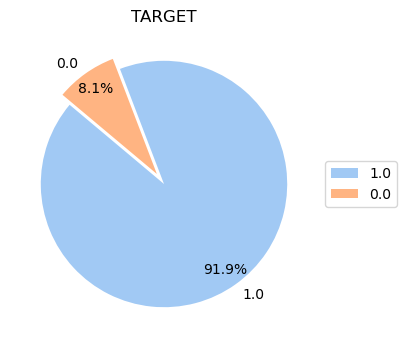

In [22]:
plot_pie(data, 'TARGET')

Somewhere along the lines, our values got switched (0 became 1 and 1 became 0). Let's fix that.

In [26]:
data['TARGET'].value_counts(normalize=True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

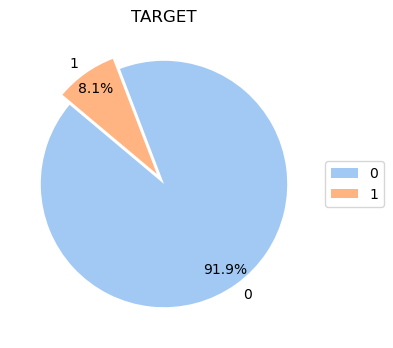

In [38]:
plot_pie(data, 'TARGET')

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import xgboost as xgb
from imblearn.over_sampling import SMOTE

In [40]:
def preprocess(data):
    X = data.drop(columns=['TARGET'])
    y = data['TARGET']

    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
    class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)
    return X_train, X_test, y_train, y_test, class_weights_dict

In [41]:
def machine_learning(X_train, X_test, y_train, y_test, class_weights_dict):
    # Logistic Regression
    log_reg = LogisticRegression(class_weight=class_weights_dict)
    log_reg.fit(X_train, y_train)
    y_pred_log_reg = log_reg.predict(X_test)
    print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
    print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))
    print('confusion matrix:\n', confusion_matrix(y_test, y_pred_log_reg))
    print('roc_auc_score:\n', roc_auc_score(y_test, y_pred_log_reg))

    # Random Forest
    random_forest = RandomForestClassifier(class_weight=class_weights_dict)
    random_forest.fit(X_train, y_train)
    y_pred_random_forest = random_forest.predict(X_test)
    print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_random_forest))
    print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_random_forest))
    print('confusion matrix:\n', confusion_matrix(y_test, y_pred_random_forest))
    print('roc_auc_score:\n', roc_auc_score(y_test, y_pred_random_forest))

    # XGBoost
    xgboost = xgb.XGBClassifier(scale_pos_weight=class_weights_dict[1] / class_weights_dict[0])
    xgboost.fit(X_train, y_train)
    y_pred_xgboost = xgboost.predict(X_test)
    print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgboost))
    print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgboost))
    print('confusion matrix:\n', confusion_matrix(y_test, y_pred_xgboost))
    print('roc_auc_score:\n', roc_auc_score(y_test, y_pred_xgboost))

    return y_pred_log_reg, y_pred_random_forest, y_pred_xgboost

In [42]:
X_train, X_test, y_train, y_test, class_weights_dict = preprocess(data)
y_pred_log_reg, y_pred_random_forest, y_pred_xgboost = machine_learning(
    X_train, X_test, y_train, y_test, class_weights_dict)

c:\Users\Youssof\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.635090971172138
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.65      0.76     56574
           1       0.11      0.51      0.18      4929

    accuracy                           0.64     61503
   macro avg       0.53      0.58      0.47     61503
weighted avg       0.87      0.64      0.72     61503

confusion matrix:
 [[36528 20046]
 [ 2397  2532]]
roc_auc_score:
 0.5796810412599609
Random Forest Accuracy: 0.9198087898151309
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56574
           1       0.29      0.00      0.00      4929

    accuracy                           0.92     61503
   macro avg       0.60      0.50      0.48     61503
weighted avg       0.87      0.92      0.88     61503

confusion matrix:
 [[56569     5]
 [ 4927     2]]
roc_auc_score:
 0.500158690998347
XGBo

Lets try oversampling

In [43]:
def preprocess_oversampled(data):
    X = data.drop(columns=['TARGET'])
    y = data['TARGET']

    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
    class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}

    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Split the resampled data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.2, random_state=321)


    return X_train, X_test, y_train, y_test, class_weights_dict

In [44]:
X_train, X_test, y_train, y_test, class_weights_dict = preprocess_oversampled(data)
y_pred_log_reg, y_pred_random_forest, y_pred_xgboost = machine_learning(
    X_train, X_test, y_train, y_test, class_weights_dict)

c:\Users\Youssof\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.5004908246738891
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.00      0.00     56476
           1       0.50      1.00      0.67     56599

    accuracy                           0.50    113075
   macro avg       0.43      0.50      0.33    113075
weighted avg       0.43      0.50      0.33    113075

confusion matrix:
 [[    7 56469]
 [   13 56586]]
roc_auc_score:
 0.4999471302091378


It looks like, after over sampling, Random Forest is the best model out of the three to use. More specifically,
- roc_auc score of about 0.96 is very good and shows that the model is balanced and able to predict both the 0 and 1 target classes.  So, we can see that safely use it when predicting who will pay their loans back on time.
- The precision and recall values are also very close to (if not) 1 - which further shows how well the random forest model does in predicting both classes.

# Ideas for futher enhancment


Regarding our current algorithms we can further:
- perform k-fold cross validation to make sure the metrics are completely reliable and not just great by chance.
- perform hyperparameter optimization instead of using the default values that we used there.
- Use something like hyperopt for the above.
- Try out more classification algorithms
- Try boosting and/or bagging techniques
<br> 

Also, Overall we can:
- Perform EDA on previous applications
- Check correlations between different features
- Check feature importance using random forest, for example. Then, remove the unimportant columns, before running the machine learning algorithms again.
- Try out PCA and then clustering on the data and see if any interesting clusters are performed.

